# Exercise 0
Already completed in exercise statement

<Figure size 640x480 with 0 Axes>

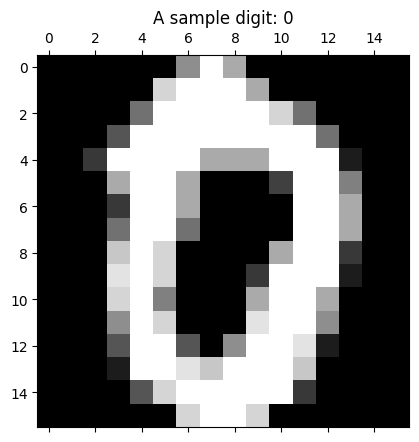

<Figure size 640x480 with 0 Axes>

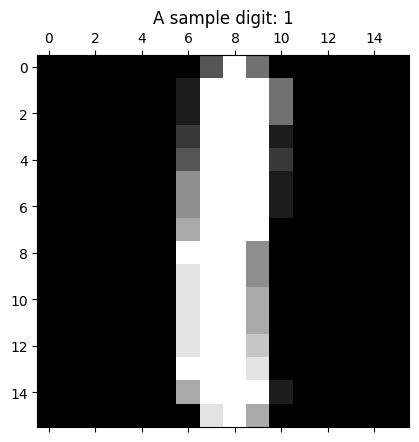

/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


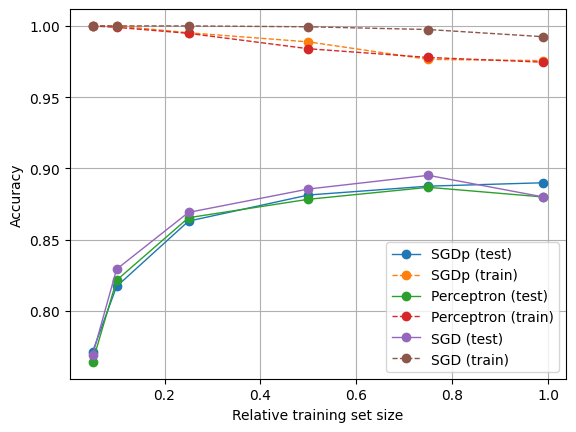

In [23]:
# Initial script
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
@author: 

Example mostly taken from scikit-learn    
"""

from time import time

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.neural_network import MLPClassifier

def get_digit(X,i,dim=8):
    dig = X[i].reshape(dim,dim)
    if dim == 16: dig = dig.T
    return dig

def show_digit(X,i,dim=8):
    """ Auxiliary function to show a digit """
    plt.gray()
    plt.matshow(get_digit(X,i,dim))
    plt.title("A sample digit: "+str(y[i]))
    plt.show()


#%% Load a dataset and plot some samples
d = 16 # choose between using 8x8 or 16x16 digits.
if d == 8:
    digits = datasets.load_digits()
    X, y = digits.data/16, digits.target
else:
    mat = loadmat('mnist16.mat', squeeze_me=True, struct_as_record=False)
    X, y = mat['A'].data/144, mat['A'].nlab - 1


show_digit(X,13,dim=d)
show_digit(X,280,dim=d)


# Plot images of the digits
n_img_per_row = 10
h = d+2 # height/width of each digit 
img = np.zeros(( h * n_img_per_row , h * n_img_per_row ))
for i in range(n_img_per_row):
    ix = h * i + 1
    for j in range(n_img_per_row):
        iy = h * j + 1
        k = np.random.randint(len(X))
        img[ix:ix + d, iy:iy + d] = get_digit(X,k,dim=d)
"""
plt.imshow(img, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()
"""

#%%
# Create a list of classifiers
# To add a classifier ad a tuple to the list 'classifiers'.
# The tuple must be of the form:
# ( "NAME" , lw , clf )
# where "NAME" is the name you want to appear in the plots, lw is
# the line width for the plots and clf is the classifier itself, a
# scikit-lear object.

classifiers = [
    ("SGDp",1, SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', penalty=None)),
    ("Perceptron", 1,Perceptron(tol=1e-5,max_iter=100,eta0=1)),
    ("SGD",1, SGDClassifier(loss='squared_hinge', penalty=None))
]


#%% ---------------------------------------
## Exercise 0
###########################################

heldout = [0.95, 0.9,0.75, 0.50, 0.25, 0.01] # Ratio of samples left out from training, for error estimation
rounds = 5 # Number of repetitions to compute average error


xx = 1. - np.array(heldout)
seed = np.random.randint(100)
yyTime = []
for name, lws, clf in classifiers:
    #print("\n   Training %s" % name)
    rng = np.random.RandomState(seed)  #to have the same for all classifiers
    yyTr = []
    yyTs = []
    yyTime_aux = []
    
    for i in heldout:
        tr_time = 0
    
        ssumTr = 0
        ssumTs = 0
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=rng)

            t_ini = time()
            clf.fit(X_train, y_train)
            tr_time += time() - t_ini

            y_pred = clf.predict(X_test)

            ssumTr += clf.score(X_train,y_train)
            ssumTs += clf.score(X_test,y_test)
            

        yyTr.append(ssumTr/rounds)
        yyTs.append(ssumTs/rounds)
        yyTime_aux.append(tr_time/rounds)

        #print("Average training time after {} rounds: {}".format(rounds,tr_time/rounds))
        #print("average accuracy: {}".format(yyTs[-1]))
    
    plt.plot(xx, yyTs, '-o',lw=lws ,label=name+' (test)')
    plt.plot(xx, yyTr, '--o',lw=lws, label=name+' (train)')
    yyTime.append(yyTime_aux)
plt.legend(loc="lower right")
plt.xlabel("Relative training set size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

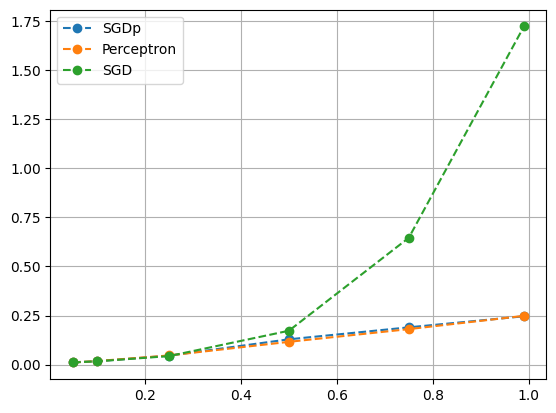

In [24]:
# plt.plot(xx, yyTs, '-o',lw=lws ,label=name+' (test)')
# plt.plot(xx, yyTr, '--o',lw=lws, label=name+' (train)')
plt.plot(xx, yyTime[0], '--o', label='SGDp')
plt.plot(xx, yyTime[1], '--o', label='Perceptron')
plt.plot(xx, yyTime[2], '--o', label='SGD')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

## Discusión
**Optimización**: 
- Tanto el SGDp como SGD son algoritmos de optimización utilizados principalmente en el entrenamiento de modelos de aprendizaje automático, mientras que el Perceptrón es un algoritmo específico diseñado para la clasificación binaria.

**Gradiente Estocástico vs Aprendizaje Basado en Errores:**
- Tanto **SGDp** como **SGD** utilizan el gradiente estocástico para actualizar los parámetros del modelo durante el entrenemiento. Calculan el gradiente de la función de pérdida con respecto a los parámetros del modelo y luego realizan ajustes basados en este gradiente.
- En contraste, el **Perceptrón** utiliza un enfoque basad en errores. Ajusta iterativamente los pesos del modelo en función de los errores cometidos en la clasificación de ejemplos de entrenamiento. Cuando se comete un error, los pesos se ajustan para que el modelo haga una mejor predicción en el próximo intento.

**Flexibilidad del Modelo:**
- **SGDp** y **SGD** son algoritmos de optimización generalizados que pueden ser utilizados para entrenar una variedad de modelos de aprendizaje automático, incluyendo redes neuronales.
- El **Perceptrón**, por otro lado, es específico para la clasificación binaria y asume que los datos son linealmente separables. Aunque puede no ser efectivo en ciertos casos.

**Convergencia y Estabilidad:**
- **SGDp** y **SGD** están diseñados para converger hacia un mínimo de la función de pérdida, lo que les permite ajustar modelos de manera efectiva en casi todas las situaciones.
- El **Perceptrón** no garantiza la convergencia si los datos no son linealmente separables. Cuando esto se da, el algoritmo oscilará indefinidamente sin alcanzar una solución óptima.

**Respuesta:**
- Con esto en mente, simplemente observando la gráfica y fijándonos en la 'accuracy', el SGP tiene el mayor 'accuracy' respecto a toda las particiones train-test del dataset. También podemos ver como la línea marrón (SGD train) es la más constante y se mantiene superior al resto por o que podemos aceptar que el SGD es la mejor y el mejor clasificador de los que tenemos en la imagen.

# Exercise 1: Single Hidden Layer MLP


In [25]:
# Vamos a asumir que la ejecución es secuencial por lo que X e y están definidos y no necesitamos repetir imports
from sklearn.metrics import accuracy_score
# Aqui vamos a declarar todos los parámetros variables para el MLP
trainSize = 0.8
testSize = 1. - trainSize
neuron_range = range(5,21)
average_accuracy = []
training_times = []

# Separamos el dataset en entrenamiento y testo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)

# Inicializamos el MLP con la primera iteración de  neuronas de la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(5), max_iter=130, alpha=1e-4, solver='sgd', tol=1e-4, 
                    random_state=1, learning_rate_init=.1) # Si molesta mucho eliminamos el verbose

# Procedemos al bucle principal del ejercicio 1
for neurons in neuron_range:
    mlp.set_params(hidden_layer_sizes=(neurons)) # Setteamos el numero de neuronas de la capa oculata
    start_time = time () # 
    mlp.fit(X_train, y_train) # Entrenamos el modelo
    end_time = time () # 
    training_time = end_time - start_time # Calculamos el tiempo de entrenamiento
    # 
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #
    average_accuracy.append(accuracy)
    training_times.append(training_time)
    #
    print(f"N'umero de neuronas: {neurons} || Accuracy: {accuracy} ||  Training Time: {training_time}\n")
    
# Vamos a mostrar las medias
avg_accuracy = sum(average_accuracy) / len(average_accuracy) 
avg_training_time = sum(training_times) / len(training_times)

print(f'\n\nAverage Accuracy: {avg_accuracy}')
print(f'Average Training Time: {avg_training_time}')


/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 5 || Accuracy: 0.86 ||  Training Time: 0.6444013118743896



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 6 || Accuracy: 0.8475 ||  Training Time: 0.6352307796478271



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 7 || Accuracy: 0.8775 ||  Training Time: 0.6517069339752197



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 8 || Accuracy: 0.875 ||  Training Time: 0.6476092338562012

N'umero de neuronas: 9 || Accuracy: 0.9075 ||  Training Time: 0.6413049697875977



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 10 || Accuracy: 0.915 ||  Training Time: 0.6660127639770508



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 11 || Accuracy: 0.925 ||  Training Time: 0.7600193023681641

N'umero de neuronas: 12 || Accuracy: 0.9375 ||  Training Time: 0.7556307315826416



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 13 || Accuracy: 0.9275 ||  Training Time: 0.9153268337249756



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 14 || Accuracy: 0.915 ||  Training Time: 0.8008661270141602

N'umero de neuronas: 15 || Accuracy: 0.91 ||  Training Time: 0.5987370014190674

N'umero de neuronas: 16 || Accuracy: 0.925 ||  Training Time: 0.6106967926025391

N'umero de neuronas: 17 || Accuracy: 0.93 ||  Training Time: 0.5885300636291504

N'umero de neuronas: 18 || Accuracy: 0.9225 ||  Training Time: 0.5818281173706055

N'umero de neuronas: 19 || Accuracy: 0.915 ||  Training Time: 0.6488499641418457

N'umero de neuronas: 20 || Accuracy: 0.9375 ||  Training Time: 0.6274111270904541



Average Accuracy: 0.90796875
Average Training Time: 0.6733851283788681


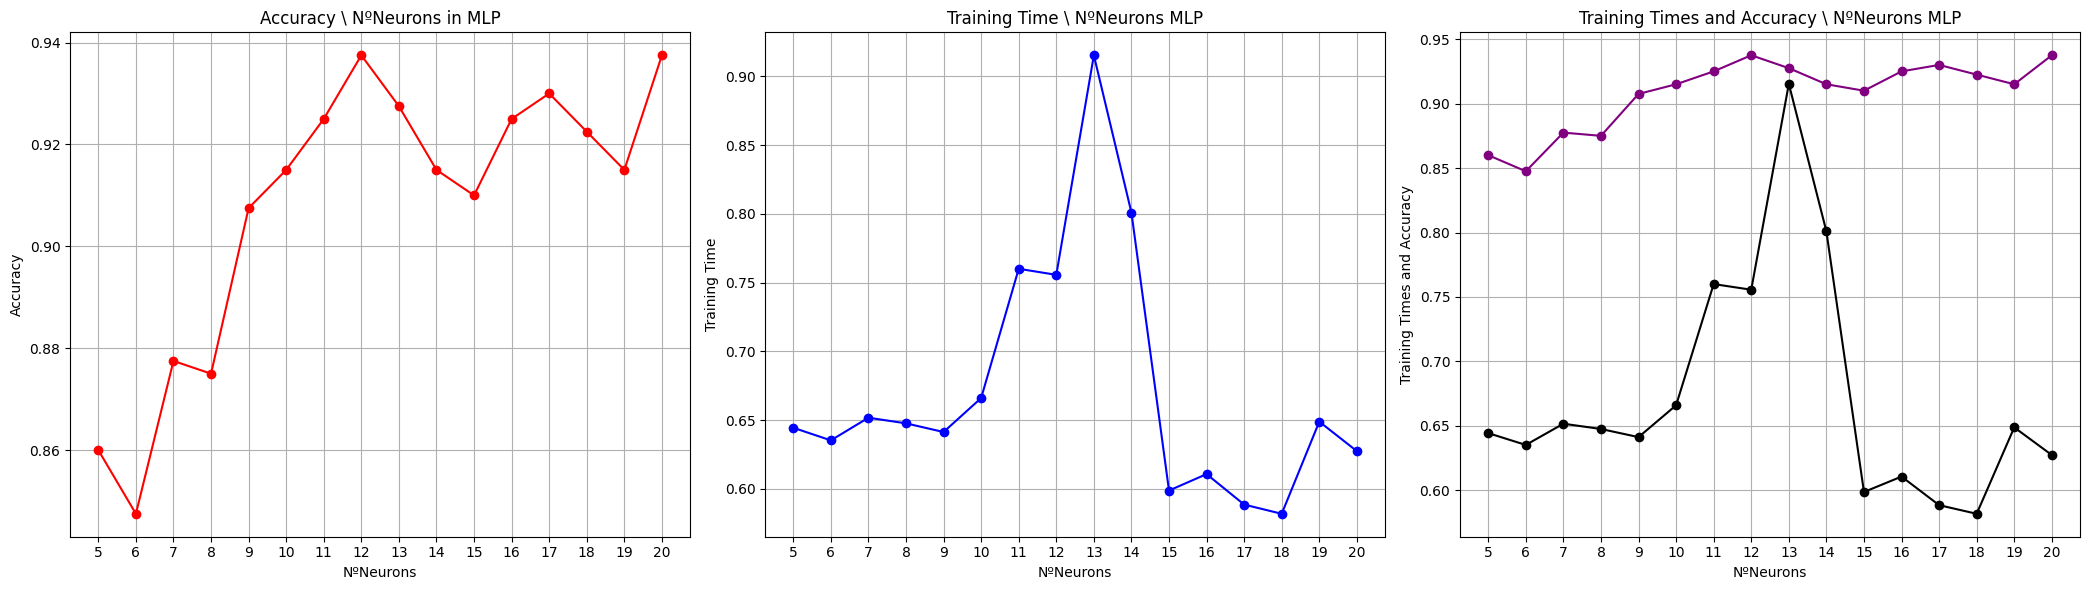

In [26]:
# Una vez hechos hechos los entrenamientos para poder manejar los resultados y gráficos vamos a hacer los plots en una celda siguiente al entrenamiento
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

# Gr'afica para la accuracy
ax1.plot(neuron_range, average_accuracy, marker='o', linestyle='-',c='red')
ax1.set_title('Accuracy \ NºNeurons in MLP')
ax1.set_xlabel('NºNeurons')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(neuron_range)
ax1.grid(True)

# Gr'afica para el tiempo de entrenamiento
ax2.plot(neuron_range, training_times, marker='o', linestyle='-', c='blue')
ax2.set_title('Training Time \ NºNeurons MLP')
ax2.set_xlabel('NºNeurons')
ax2.set_ylabel('Training Time')
ax2.set_xticks(neuron_range)
ax2.grid(True)

ax3.plot(neuron_range, average_accuracy, marker='o', linestyle='-', c='purple')
ax3.plot(neuron_range, training_times, marker='o', linestyle='-', c='black')
ax3.set_title('Training Times and Accuracy \ NºNeurons MLP')
ax3.set_xlabel('NºNeurons')
ax3.set_ylabel('Training Times and Accuracy')
ax3.set_xticks(neuron_range)
ax3.grid(True)

plt.tight_layout()
plt.show()


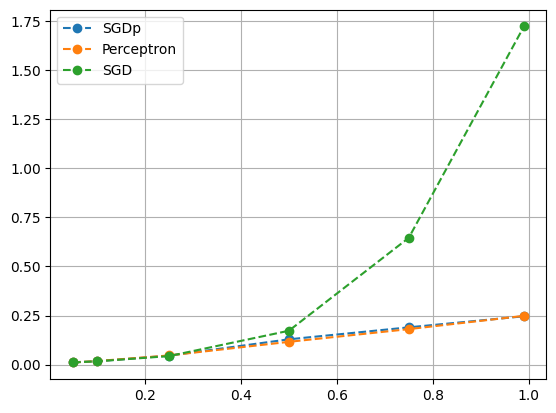

In [27]:
plt.plot(xx, yyTime[0], '--o', label='SGDp')
plt.plot(xx, yyTime[1], '--o', label='Perceptron')
plt.plot(xx, yyTime[2], '--o', label='SGD')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

### Discuss 

**Accuracy:** 
- El MLP tiene su peak en 0.93 con las 12 neuronas en la capa oculta. Por otro lado, el SGD de la primera imagen muestra de forma consistente la mayor 'accuracy' de los diversos tamaños para el conjunto de entrenamiento.

**Training Time** 
-  El tiempo de entrenamiento para el MLP varía dependiendo del número de neuronas, va desde 0.5 hasta 0.56. Por otro lado, si nos fijamos en el 0.8 en la gráfica de arriba que nos indica los tiempos de ejecución de los algoritmos del Ejercicio 1 podemos ver que tiene un rendimiento similar, a ojo un poco inferior al MLP.

**Stability:**
- La estabilidad del MLP es relativamente estable a través de los diferentes números de neuronas en la capa oculta por lo que este no parece un parámetro condicionante al menos en este caso. A su vez, el SGD también ha mostrado un rendimiento constante, con una 'accuracy' que incrementa con el tamaño del conjunto de datos de entrenamiento.

**Conclusion:**
- En conclusión, ambos son potentes clasificadores que rinden extremadamente bien en sus respectivos escenarios. El MLP tiene una gran 'accuracy' y no es muy sensible al número de neuronas de la capa oculta. El SGD es muy consistente y se mantiene con la mayor 'accuracy' a través de los diferentes tamaños de los conjuntos de datos de entramiento.

# Exercise 2

In [40]:
# Vamos a asumir que la ejecuci'on es secuencial por lo que X e y est'an definidos y no necesitamos repetir imports
from sklearn.metrics import accuracy_score
# Aqui vamos a declarar todos los par'ametros variables para el MLP
trainSize = 0.8
testSize = 1. - trainSize
neuron_range = range(5,21)
average_accuracy = []
training_times = []

# Separamos el dataset en entrenamiento y testo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)

# Inicializamos el MLP con la primera iteracion de  neuronas de la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=130, alpha=1e-4, solver='sgd', tol=1e-4, 
                    random_state=1, learning_rate_init=.1) # Si molesta mucho eliminamos el verbose

"""
    {
        "primera hidden layer neurons": (
            average_times,
            training times
        )
    }
"""
pruebas_dict = { i: dict(accuracy=list(), training=list()) for i in neuron_range }

# Procedemos al bucle principal del ejercicio 1
for neurons1 in pruebas_dict.keys():
    for neurons2 in neuron_range:
        mlp.set_params(hidden_layer_sizes=(neurons1,neurons2)) # Setteamos el numero de neuronas de la capa oculata
        start_time = time () # 
        mlp.fit(X_train, y_train) # Entrenamos el modelo
        end_time = time () # 
        training_time = end_time - start_time # Calculamos el tiempo de entrenamiento
        # 
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        #
        pruebas_dict[neurons1]["accuracy"].append(accuracy)
        pruebas_dict[neurons1]["training"].append(training_time)
        #
        print(f"N'umero de neuronas: ({neurons1},{neurons2}) || Accuracy: {accuracy} ||  Training Time: {training_time}\n")
    average_accuracy.append(sum(pruebas_dict[neurons1]["accuracy"]) / len(pruebas_dict[neurons1]["accuracy"]))
    training_times.append(sum(pruebas_dict[neurons1]["training"]) / len(pruebas_dict[neurons1]["training"]))
    
# Vamos a mostrar las medias
avg_accuracy = sum(average_accuracy) / len(average_accuracy) 
avg_training_time = sum(training_times) / len(training_times)

print(f'\n\nAverage Accuracy: {avg_accuracy}')
print(f'Average Training Time: {avg_training_time}')


N'umero de neuronas: (5,5) || Accuracy: 0.72 ||  Training Time: 0.34237194061279297

N'umero de neuronas: (5,6) || Accuracy: 0.72 ||  Training Time: 0.661268949508667

N'umero de neuronas: (5,7) || Accuracy: 0.605 ||  Training Time: 0.4141998291015625

N'umero de neuronas: (5,8) || Accuracy: 0.7225 ||  Training Time: 0.6383540630340576

N'umero de neuronas: (5,9) || Accuracy: 0.865 ||  Training Time: 0.53653883934021

N'umero de neuronas: (5,10) || Accuracy: 0.81 ||  Training Time: 0.3449091911315918



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (5,11) || Accuracy: 0.855 ||  Training Time: 0.7949566841125488

N'umero de neuronas: (5,12) || Accuracy: 0.88 ||  Training Time: 0.21238207817077637

N'umero de neuronas: (5,13) || Accuracy: 0.885 ||  Training Time: 0.2260589599609375

N'umero de neuronas: (5,14) || Accuracy: 0.5575 ||  Training Time: 0.555455207824707

N'umero de neuronas: (5,15) || Accuracy: 0.6675 ||  Training Time: 0.3224520683288574

N'umero de neuronas: (5,16) || Accuracy: 0.8175 ||  Training Time: 0.4868342876434326

N'umero de neuronas: (5,17) || Accuracy: 0.84 ||  Training Time: 0.5291039943695068



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (5,18) || Accuracy: 0.8875 ||  Training Time: 0.8201868534088135

N'umero de neuronas: (5,19) || Accuracy: 0.63 ||  Training Time: 0.5379657745361328

N'umero de neuronas: (5,20) || Accuracy: 0.86 ||  Training Time: 0.24862003326416016

N'umero de neuronas: (6,5) || Accuracy: 0.3725 ||  Training Time: 0.25838780403137207



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,6) || Accuracy: 0.865 ||  Training Time: 0.8743700981140137

N'umero de neuronas: (6,7) || Accuracy: 0.32 ||  Training Time: 0.4357168674468994

N'umero de neuronas: (6,8) || Accuracy: 0.79 ||  Training Time: 0.3220341205596924

N'umero de neuronas: (6,9) || Accuracy: 0.48 ||  Training Time: 0.13929986953735352

N'umero de neuronas: (6,10) || Accuracy: 0.8425 ||  Training Time: 0.38702392578125



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,11) || Accuracy: 0.9025 ||  Training Time: 0.7535498142242432

N'umero de neuronas: (6,12) || Accuracy: 0.8275 ||  Training Time: 0.38265395164489746

N'umero de neuronas: (6,13) || Accuracy: 0.8875 ||  Training Time: 0.31896018981933594



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,14) || Accuracy: 0.8975 ||  Training Time: 0.7723467350006104

N'umero de neuronas: (6,15) || Accuracy: 0.18 ||  Training Time: 0.7138078212738037



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,16) || Accuracy: 0.845 ||  Training Time: 0.7531888484954834



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,17) || Accuracy: 0.8875 ||  Training Time: 0.780325174331665



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,18) || Accuracy: 0.8925 ||  Training Time: 0.7837889194488525

N'umero de neuronas: (6,19) || Accuracy: 0.835 ||  Training Time: 0.2548980712890625

N'umero de neuronas: (6,20) || Accuracy: 0.295 ||  Training Time: 0.21048712730407715

N'umero de neuronas: (7,5) || Accuracy: 0.6175 ||  Training Time: 0.24941277503967285

N'umero de neuronas: (7,6) || Accuracy: 0.0825 ||  Training Time: 0.4243137836456299



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (7,7) || Accuracy: 0.8725 ||  Training Time: 0.7839672565460205



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (7,8) || Accuracy: 0.91 ||  Training Time: 0.8897919654846191

N'umero de neuronas: (7,9) || Accuracy: 0.145 ||  Training Time: 0.3238251209259033

N'umero de neuronas: (7,10) || Accuracy: 0.3925 ||  Training Time: 0.2582070827484131

N'umero de neuronas: (7,11) || Accuracy: 0.91 ||  Training Time: 0.8107280731201172



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (7,12) || Accuracy: 0.8975 ||  Training Time: 0.7790899276733398

N'umero de neuronas: (7,13) || Accuracy: 0.8575 ||  Training Time: 0.24712324142456055

N'umero de neuronas: (7,14) || Accuracy: 0.91 ||  Training Time: 0.6238400936126709

N'umero de neuronas: (7,15) || Accuracy: 0.89 ||  Training Time: 0.7953159809112549

N'umero de neuronas: (7,16) || Accuracy: 0.9125 ||  Training Time: 0.7779548168182373

N'umero de neuronas: (7,17) || Accuracy: 0.925 ||  Training Time: 0.8129599094390869



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (7,18) || Accuracy: 0.885 ||  Training Time: 0.9369802474975586

N'umero de neuronas: (7,19) || Accuracy: 0.9325 ||  Training Time: 0.5785529613494873

N'umero de neuronas: (7,20) || Accuracy: 0.935 ||  Training Time: 0.6061618328094482

N'umero de neuronas: (8,5) || Accuracy: 0.48 ||  Training Time: 0.3998081684112549



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (8,6) || Accuracy: 0.89 ||  Training Time: 0.7526819705963135

N'umero de neuronas: (8,7) || Accuracy: 0.735 ||  Training Time: 0.23396015167236328



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (8,8) || Accuracy: 0.9125 ||  Training Time: 0.7567188739776611

N'umero de neuronas: (8,9) || Accuracy: 0.705 ||  Training Time: 0.17061567306518555



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (8,10) || Accuracy: 0.89 ||  Training Time: 0.7563679218292236

N'umero de neuronas: (8,11) || Accuracy: 0.8925 ||  Training Time: 0.6096091270446777

N'umero de neuronas: (8,12) || Accuracy: 0.905 ||  Training Time: 0.6667001247406006

N'umero de neuronas: (8,13) || Accuracy: 0.905 ||  Training Time: 0.6436858177185059

N'umero de neuronas: (8,14) || Accuracy: 0.875 ||  Training Time: 0.7596762180328369



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (8,15) || Accuracy: 0.8975 ||  Training Time: 0.763887882232666

N'umero de neuronas: (8,16) || Accuracy: 0.9125 ||  Training Time: 0.6177010536193848

N'umero de neuronas: (8,17) || Accuracy: 0.9075 ||  Training Time: 0.722790002822876

N'umero de neuronas: (8,18) || Accuracy: 0.9325 ||  Training Time: 0.692274808883667

N'umero de neuronas: (8,19) || Accuracy: 0.925 ||  Training Time: 0.5147552490234375

N'umero de neuronas: (8,20) || Accuracy: 0.9225 ||  Training Time: 0.516226053237915



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (9,5) || Accuracy: 0.89 ||  Training Time: 0.7472970485687256

N'umero de neuronas: (9,6) || Accuracy: 0.9175 ||  Training Time: 0.7086029052734375

N'umero de neuronas: (9,7) || Accuracy: 0.8575 ||  Training Time: 0.3189890384674072

N'umero de neuronas: (9,8) || Accuracy: 0.895 ||  Training Time: 0.7114620208740234

N'umero de neuronas: (9,9) || Accuracy: 0.9125 ||  Training Time: 0.5054581165313721

N'umero de neuronas: (9,10) || Accuracy: 0.9225 ||  Training Time: 0.5468778610229492

N'umero de neuronas: (9,11) || Accuracy: 0.905 ||  Training Time: 0.7234139442443848

N'umero de neuronas: (9,12) || Accuracy: 0.905 ||  Training Time: 0.8205580711364746

N'umero de neuronas: (9,13) || Accuracy: 0.8775 ||  Training Time: 0.3641071319580078

N'umero de neuronas: (9,14) || Accuracy: 0.9175 ||  Training Time: 0.7673039436340332

N'umero de neuronas: (9,15) || Accuracy: 0.93 ||  Training Time: 0.5188448429107666

N'umero de neuronas: (9,16) || Accuracy: 0.95 ||  Train

/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (10,7) || Accuracy: 0.9075 ||  Training Time: 0.757086992263794

N'umero de neuronas: (10,8) || Accuracy: 0.895 ||  Training Time: 0.7352440357208252

N'umero de neuronas: (10,9) || Accuracy: 0.4325 ||  Training Time: 0.32550883293151855

N'umero de neuronas: (10,10) || Accuracy: 0.9025 ||  Training Time: 0.7386791706085205

N'umero de neuronas: (10,11) || Accuracy: 0.9125 ||  Training Time: 0.593379020690918



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (10,12) || Accuracy: 0.9075 ||  Training Time: 0.7712860107421875

N'umero de neuronas: (10,13) || Accuracy: 0.93 ||  Training Time: 0.602363109588623

N'umero de neuronas: (10,14) || Accuracy: 0.9075 ||  Training Time: 0.7686400413513184

N'umero de neuronas: (10,15) || Accuracy: 0.9125 ||  Training Time: 0.7565209865570068

N'umero de neuronas: (10,16) || Accuracy: 0.925 ||  Training Time: 0.6792449951171875

N'umero de neuronas: (10,17) || Accuracy: 0.94 ||  Training Time: 0.7656490802764893

N'umero de neuronas: (10,18) || Accuracy: 0.9375 ||  Training Time: 0.665395975112915

N'umero de neuronas: (10,19) || Accuracy: 0.93 ||  Training Time: 0.660485029220581

N'umero de neuronas: (10,20) || Accuracy: 0.775 ||  Training Time: 0.18825912475585938



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (11,5) || Accuracy: 0.8325 ||  Training Time: 0.7818360328674316



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (11,6) || Accuracy: 0.8625 ||  Training Time: 0.7920477390289307

N'umero de neuronas: (11,7) || Accuracy: 0.9125 ||  Training Time: 0.5905349254608154



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (11,8) || Accuracy: 0.885 ||  Training Time: 0.8483467102050781

N'umero de neuronas: (11,9) || Accuracy: 0.92 ||  Training Time: 0.6448662281036377



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (11,10) || Accuracy: 0.91 ||  Training Time: 0.8027598857879639

N'umero de neuronas: (11,11) || Accuracy: 0.9125 ||  Training Time: 0.804131031036377

N'umero de neuronas: (11,12) || Accuracy: 0.93 ||  Training Time: 0.6242470741271973

N'umero de neuronas: (11,13) || Accuracy: 0.915 ||  Training Time: 0.5715939998626709

N'umero de neuronas: (11,14) || Accuracy: 0.925 ||  Training Time: 0.5870790481567383



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (11,15) || Accuracy: 0.91 ||  Training Time: 0.8155128955841064

N'umero de neuronas: (11,16) || Accuracy: 0.9225 ||  Training Time: 0.5770471096038818

N'umero de neuronas: (11,17) || Accuracy: 0.93 ||  Training Time: 0.5554897785186768

N'umero de neuronas: (11,18) || Accuracy: 0.9225 ||  Training Time: 0.5460929870605469

N'umero de neuronas: (11,19) || Accuracy: 0.9225 ||  Training Time: 0.5509169101715088

N'umero de neuronas: (11,20) || Accuracy: 0.925 ||  Training Time: 0.6698811054229736



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (12,5) || Accuracy: 0.895 ||  Training Time: 0.758620023727417

N'umero de neuronas: (12,6) || Accuracy: 0.91 ||  Training Time: 0.7095239162445068

N'umero de neuronas: (12,7) || Accuracy: 0.8975 ||  Training Time: 0.7095260620117188

N'umero de neuronas: (12,8) || Accuracy: 0.9 ||  Training Time: 0.6906900405883789

N'umero de neuronas: (12,9) || Accuracy: 0.8875 ||  Training Time: 0.3709719181060791

N'umero de neuronas: (12,10) || Accuracy: 0.9 ||  Training Time: 0.5001931190490723

N'umero de neuronas: (12,11) || Accuracy: 0.925 ||  Training Time: 0.6531569957733154

N'umero de neuronas: (12,12) || Accuracy: 0.8875 ||  Training Time: 0.7281129360198975

N'umero de neuronas: (12,13) || Accuracy: 0.9275 ||  Training Time: 0.552454948425293

N'umero de neuronas: (12,14) || Accuracy: 0.925 ||  Training Time: 0.6530280113220215

N'umero de neuronas: (12,15) || Accuracy: 0.8975 ||  Training Time: 0.7335770130157471

N'umero de neuronas: (12,16) || Accuracy: 0.92 || 

/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (13,5) || Accuracy: 0.8675 ||  Training Time: 0.7854688167572021

N'umero de neuronas: (13,6) || Accuracy: 0.7 ||  Training Time: 0.17861318588256836

N'umero de neuronas: (13,7) || Accuracy: 0.9275 ||  Training Time: 0.589622974395752

N'umero de neuronas: (13,8) || Accuracy: 0.9175 ||  Training Time: 0.5204360485076904

N'umero de neuronas: (13,9) || Accuracy: 0.93 ||  Training Time: 0.5124611854553223

N'umero de neuronas: (13,10) || Accuracy: 0.9025 ||  Training Time: 0.6560089588165283

N'umero de neuronas: (13,11) || Accuracy: 0.925 ||  Training Time: 0.5930831432342529

N'umero de neuronas: (13,12) || Accuracy: 0.8975 ||  Training Time: 0.8285818099975586

N'umero de neuronas: (13,13) || Accuracy: 0.9325 ||  Training Time: 0.5438098907470703

N'umero de neuronas: (13,14) || Accuracy: 0.93 ||  Training Time: 0.5576188564300537

N'umero de neuronas: (13,15) || Accuracy: 0.9375 ||  Training Time: 0.6804540157318115

N'umero de neuronas: (13,16) || Accuracy: 0.9

/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (14,6) || Accuracy: 0.8975 ||  Training Time: 0.8263931274414062

N'umero de neuronas: (14,7) || Accuracy: 0.94 ||  Training Time: 0.6122629642486572

N'umero de neuronas: (14,8) || Accuracy: 0.91 ||  Training Time: 0.6283199787139893



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (14,9) || Accuracy: 0.9 ||  Training Time: 0.7931058406829834

N'umero de neuronas: (14,10) || Accuracy: 0.9225 ||  Training Time: 0.5666038990020752

N'umero de neuronas: (14,11) || Accuracy: 0.9225 ||  Training Time: 0.5398552417755127

N'umero de neuronas: (14,12) || Accuracy: 0.92 ||  Training Time: 0.7408649921417236

N'umero de neuronas: (14,13) || Accuracy: 0.9125 ||  Training Time: 0.5200109481811523

N'umero de neuronas: (14,14) || Accuracy: 0.95 ||  Training Time: 0.5082461833953857

N'umero de neuronas: (14,15) || Accuracy: 0.9275 ||  Training Time: 0.5174789428710938

N'umero de neuronas: (14,16) || Accuracy: 0.92 ||  Training Time: 0.6538350582122803

N'umero de neuronas: (14,17) || Accuracy: 0.9375 ||  Training Time: 0.7087497711181641

N'umero de neuronas: (14,18) || Accuracy: 0.9425 ||  Training Time: 0.4377570152282715

N'umero de neuronas: (14,19) || Accuracy: 0.92 ||  Training Time: 0.599463939666748

N'umero de neuronas: (14,20) || Accuracy: 0.9

/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (15,5) || Accuracy: 0.8725 ||  Training Time: 0.8387062549591064

N'umero de neuronas: (15,6) || Accuracy: 0.9225 ||  Training Time: 0.5985279083251953

N'umero de neuronas: (15,7) || Accuracy: 0.905 ||  Training Time: 0.6295590400695801

N'umero de neuronas: (15,8) || Accuracy: 0.9075 ||  Training Time: 0.5758230686187744

N'umero de neuronas: (15,9) || Accuracy: 0.925 ||  Training Time: 0.5956799983978271

N'umero de neuronas: (15,10) || Accuracy: 0.9175 ||  Training Time: 0.5008261203765869

N'umero de neuronas: (15,11) || Accuracy: 0.915 ||  Training Time: 0.5022141933441162

N'umero de neuronas: (15,12) || Accuracy: 0.9175 ||  Training Time: 0.6254808902740479

N'umero de neuronas: (15,13) || Accuracy: 0.93 ||  Training Time: 0.5668590068817139

N'umero de neuronas: (15,14) || Accuracy: 0.92 ||  Training Time: 0.5862641334533691

N'umero de neuronas: (15,15) || Accuracy: 0.92 ||  Training Time: 0.5078079700469971

N'umero de neuronas: (15,16) || Accuracy: 0.93

/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (16,5) || Accuracy: 0.91 ||  Training Time: 0.8057918548583984

N'umero de neuronas: (16,6) || Accuracy: 0.92 ||  Training Time: 0.6393458843231201

N'umero de neuronas: (16,7) || Accuracy: 0.9075 ||  Training Time: 0.48232197761535645

N'umero de neuronas: (16,8) || Accuracy: 0.925 ||  Training Time: 0.565864086151123

N'umero de neuronas: (16,9) || Accuracy: 0.9 ||  Training Time: 0.7380118370056152

N'umero de neuronas: (16,10) || Accuracy: 0.9325 ||  Training Time: 0.45803403854370117

N'umero de neuronas: (16,11) || Accuracy: 0.9525 ||  Training Time: 0.6145279407501221

N'umero de neuronas: (16,12) || Accuracy: 0.8 ||  Training Time: 0.4532589912414551

N'umero de neuronas: (16,13) || Accuracy: 0.9225 ||  Training Time: 0.5671758651733398

N'umero de neuronas: (16,14) || Accuracy: 0.9175 ||  Training Time: 0.6499018669128418

N'umero de neuronas: (16,15) || Accuracy: 0.9175 ||  Training Time: 0.6422820091247559

N'umero de neuronas: (16,16) || Accuracy: 0.937

/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (17,5) || Accuracy: 0.8975 ||  Training Time: 0.9398040771484375



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (17,6) || Accuracy: 0.9225 ||  Training Time: 0.8533728122711182



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (17,7) || Accuracy: 0.9025 ||  Training Time: 0.8650150299072266

N'umero de neuronas: (17,8) || Accuracy: 0.9075 ||  Training Time: 0.743459939956665



/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (17,9) || Accuracy: 0.865 ||  Training Time: 0.9772570133209229

N'umero de neuronas: (17,10) || Accuracy: 0.925 ||  Training Time: 0.7530639171600342

N'umero de neuronas: (17,11) || Accuracy: 0.94 ||  Training Time: 0.702347993850708

N'umero de neuronas: (17,12) || Accuracy: 0.9275 ||  Training Time: 0.5721478462219238

N'umero de neuronas: (17,13) || Accuracy: 0.9125 ||  Training Time: 0.7659931182861328

N'umero de neuronas: (17,14) || Accuracy: 0.915 ||  Training Time: 0.6471619606018066

N'umero de neuronas: (17,15) || Accuracy: 0.915 ||  Training Time: 0.5550799369812012

N'umero de neuronas: (17,16) || Accuracy: 0.925 ||  Training Time: 0.6251430511474609

N'umero de neuronas: (17,17) || Accuracy: 0.94 ||  Training Time: 0.5948410034179688

N'umero de neuronas: (17,18) || Accuracy: 0.9175 ||  Training Time: 0.4688141345977783

N'umero de neuronas: (17,19) || Accuracy: 0.92 ||  Training Time: 0.5874011516571045

N'umero de neuronas: (17,20) || Accuracy: 0.9

/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (18,5) || Accuracy: 0.885 ||  Training Time: 0.8520622253417969

N'umero de neuronas: (18,6) || Accuracy: 0.905 ||  Training Time: 0.8451828956604004

N'umero de neuronas: (18,7) || Accuracy: 0.9075 ||  Training Time: 0.6596720218658447

N'umero de neuronas: (18,8) || Accuracy: 0.9025 ||  Training Time: 0.5156331062316895

N'umero de neuronas: (18,9) || Accuracy: 0.92 ||  Training Time: 0.7570309638977051

N'umero de neuronas: (18,10) || Accuracy: 0.935 ||  Training Time: 0.6491689682006836

N'umero de neuronas: (18,11) || Accuracy: 0.925 ||  Training Time: 0.7169399261474609

N'umero de neuronas: (18,12) || Accuracy: 0.925 ||  Training Time: 0.5863962173461914

N'umero de neuronas: (18,13) || Accuracy: 0.9375 ||  Training Time: 0.6160068511962891

N'umero de neuronas: (18,14) || Accuracy: 0.94 ||  Training Time: 0.6700708866119385

N'umero de neuronas: (18,15) || Accuracy: 0.915 ||  Training Time: 0.6321380138397217

N'umero de neuronas: (18,16) || Accuracy: 0.93 

/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (19,7) || Accuracy: 0.915 ||  Training Time: 0.8694417476654053

N'umero de neuronas: (19,8) || Accuracy: 0.915 ||  Training Time: 0.8401122093200684

N'umero de neuronas: (19,9) || Accuracy: 0.925 ||  Training Time: 0.6196517944335938

N'umero de neuronas: (19,10) || Accuracy: 0.9325 ||  Training Time: 0.4921908378601074

N'umero de neuronas: (19,11) || Accuracy: 0.925 ||  Training Time: 0.5131969451904297

N'umero de neuronas: (19,12) || Accuracy: 0.9475 ||  Training Time: 0.5851459503173828

N'umero de neuronas: (19,13) || Accuracy: 0.95 ||  Training Time: 0.47728896141052246

N'umero de neuronas: (19,14) || Accuracy: 0.9425 ||  Training Time: 0.4509449005126953

N'umero de neuronas: (19,15) || Accuracy: 0.93 ||  Training Time: 0.552509069442749

N'umero de neuronas: (19,16) || Accuracy: 0.935 ||  Training Time: 0.540992021560669

N'umero de neuronas: (19,17) || Accuracy: 0.9425 ||  Training Time: 0.7048547267913818

N'umero de neuronas: (19,18) || Accuracy: 0.9

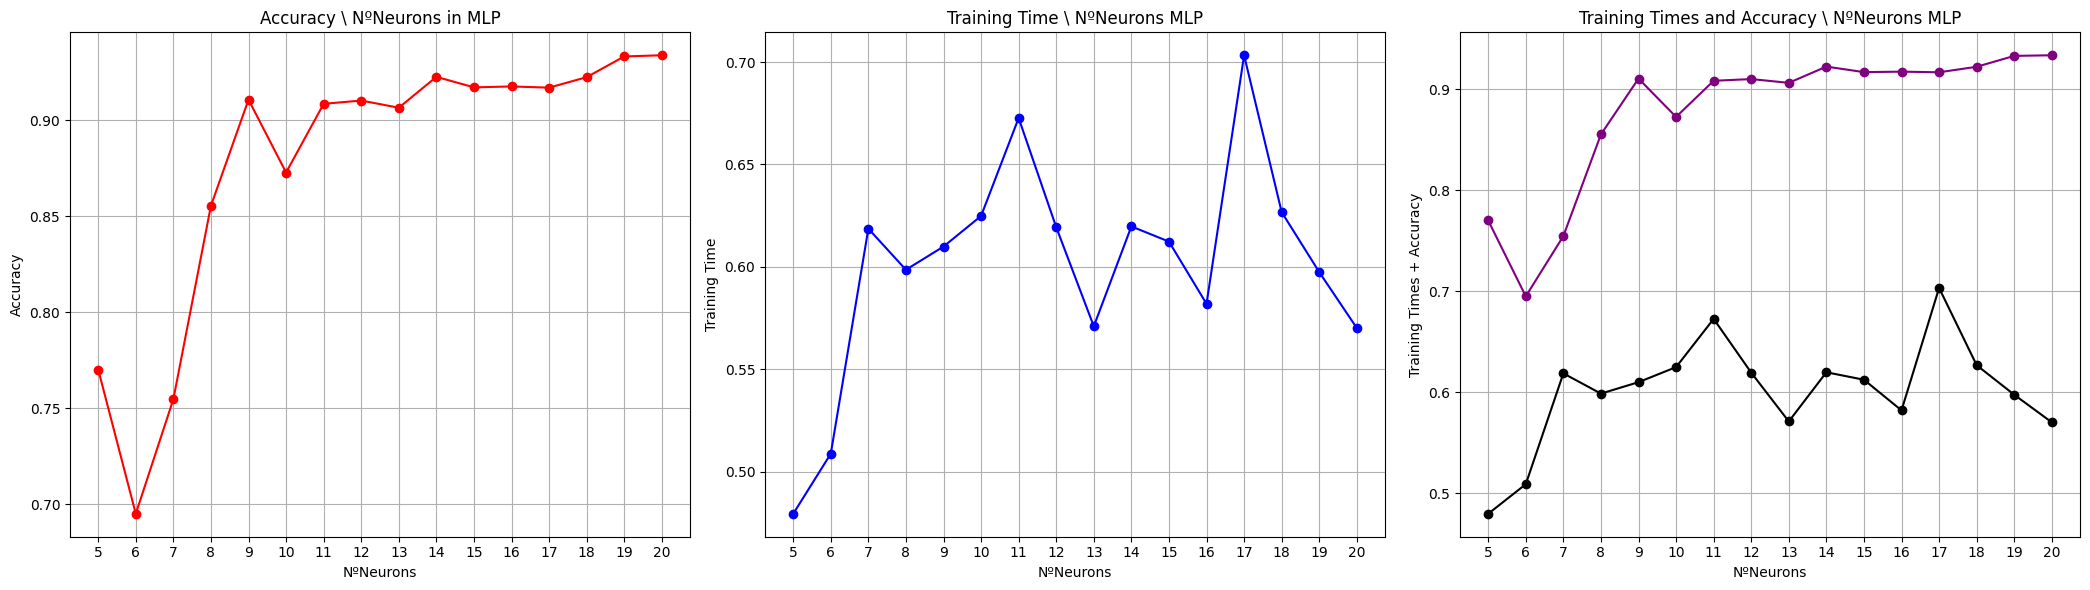

[]

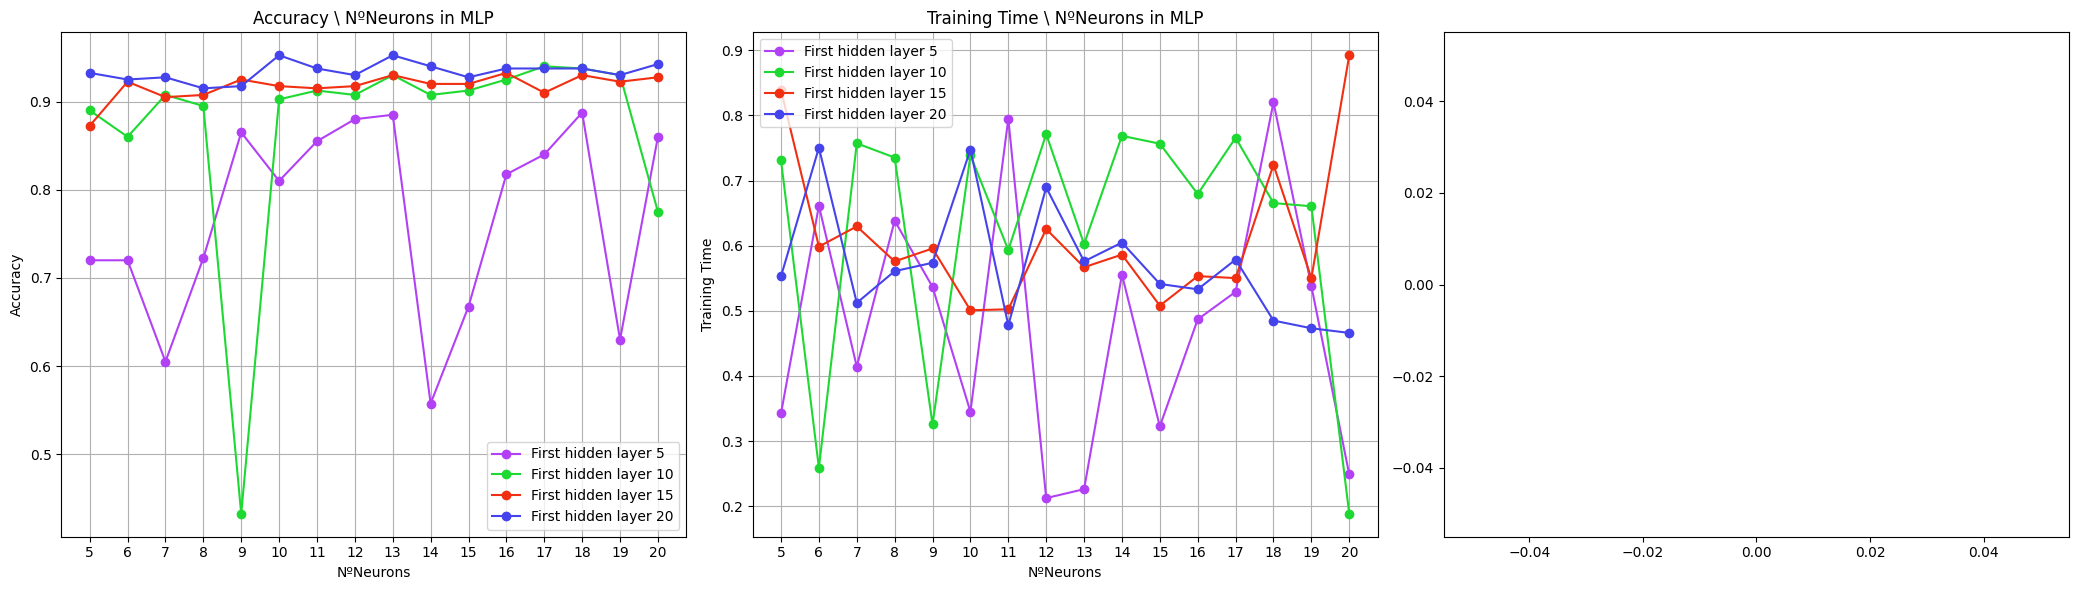

In [48]:
# Una vez hechos hechos los entrenamientos para poder manejar los resultados y gr'aficas vamos a hacer los plots en una celda siguiente al entrenamiento
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

# Gr'afica para la accuracy
ax1.plot(neuron_range, average_accuracy, marker='o', linestyle='-',c='red')
ax1.set_title('Accuracy \ NºNeurons in MLP')
ax1.set_xlabel('NºNeurons')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(neuron_range)
ax1.grid(True)

# Gr'afica para el tiempo de entrenamiento
ax2.plot(neuron_range, training_times, marker='o', linestyle='-', c='blue')
ax2.set_title('Training Time \ NºNeurons MLP')
ax2.set_xlabel('NºNeurons')
ax2.set_ylabel('Training Time')
ax2.set_xticks(neuron_range)
ax2.grid(True)

ax3.plot(neuron_range, average_accuracy, marker='o', linestyle='-', c='purple')
ax3.plot(neuron_range, training_times, marker='o', linestyle='-', c='black')
ax3.set_title('Training Times and Accuracy \ NºNeurons MLP')
ax3.set_xlabel('NºNeurons')
ax3.set_ylabel('Training Times + Accuracy')
ax3.set_xticks(neuron_range)
ax3.grid(True)

plt.tight_layout()
plt.show()

colors = [ (np.random.random(), np.random.random(), np.random.random()) for _ in neuron_range ]

fig, (comp1, comp2, comp3) = plt.subplots(1,3, figsize=(21,6))
for i, (key, times) in enumerate(pruebas_dict.items()):
    if key % 5 == 0:
        comp1.plot(neuron_range, 
               times['accuracy'], 
               marker='o', 
               linestyle='-', 
               c=colors[i], 
               label=f"First hidden layer {key}")

comp1.set_title('Accuracy \ NºNeurons in MLP')
comp1.set_xlabel('NºNeurons')
comp1.set_ylabel('Accuracy')
comp1.set_xticks(neuron_range)
comp1.legend()
comp1.grid(True)

for i, (key, times) in enumerate(pruebas_dict.items()):
    if key % 5 == 0:
        comp2.plot(neuron_range, times["training"], marker='o', linestyle='-',c=colors[i], label=f"First hidden layer {key}")

comp2.set_title('Training Time \ NºNeurons in MLP')
comp2.set_xlabel('NºNeurons')
comp2.set_ylabel('Training Time')
comp2.set_xticks(neuron_range)
comp2.legend()
comp2.grid(True)

"""
for i, (key, times) in enumerate(pruebas_dict.items()):
    if key % 5 == 0:
        comp3.plot(neuron_range, times["training"], marker='o', linestyle='-', c=colors[i])
        comp3.plot(neuron_range, times["accuracy"], marker='o', linestyle='-', c=colors[i], label=f"First hidden layer {key}")

comp3.set_title('Training Times and Accuracy \ NºNeurons MLP')
comp3.set_xlabel('NºNeurons')
comp3.set_ylabel('Training Times + Accuracy')
comp3.set_xticks(neuron_range)
comp3.legend()
comp3.grid(True)
"""
plt.tight_layout()
plt.plot()

### Discuss
Viendo toda las gráficas que hemos expuesto, puedo declarar que en el caso de la segunda (con 2 capas ocultas de neuronas) es mejor que la primera pero no por tener más o menos neuronas sino por que bien podemos observar como a medidad que aumentamos el número de neuronas por capa notamos como la gráfica de 'accuracy' se estabiliza hasta tener un valor constante por encima de los 0.91 puntos que se traducen en un 91% de 'accuracy' y con un tiempo considerablemente bajo de entrenamiento del modelo con menos de 0.4 segundos en su entrenamiento. En el otro caso (una única capa oculta de neuronas) podemos observar como el tiempo de entrenamiento prácticamente no baja de 0.4 segundos y tiene picos de 0.6 segundos con valores de la 'accuracy' inferiores a 0.9 puntos lo que nos supondría una carga dependiendo de la naturaleza del problema.

# Exercise 3

In [30]:
# Como he comentado con anterioridad, voy a escoger el del ejercicio 2 para realizar las pruebas cambiando los tamanos del conjunto de datos de entrenamiento
# Voy a fijar el número de neuronas por cada a 20 neuronas y las 2 capas

# Vamos a asumir que la ejecución es secuencial por lo que X e y están definidos y no necesitamos repetir imports
from sklearn.metrics import accuracy_score
# Aqui vamos a declarar todos los parámetros variables para el MLP
trainSize = np.arange(.02, 1., .02)
testSize = 1. - trainSize
training_times = []
test_size_list = []
testRatios = []
trainRatios = []
# Separamos el dataset en entrenamiento y testo


# Inicializamos el MLP con la primera iteración de  neuronas de la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=130, alpha=1e-4, solver='sgd', tol=1e-4, 
                    random_state=1, learning_rate_init=.1) # Si molesta mucho eliminamos el verbose

# Procedemos al bucle principal del ejercicio 1
for t in testSize:
    # Primero separamos el dataset 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=42)
    #
    start_time = time () # 
    mlp.fit(X_train, y_train) # Entrenamos el modelo
    end_time = time () # 
    
    training_time = end_time - start_time # Calculamos el tiempo de entrenamiento
    
    
    
    # Test Accuracy 
    accuracy_test = mlp.score(X_test, y_test)
    testRatios.append(accuracy_test)
    
    # Train Accuracy
    y_pred_train = mlp.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train) # 
    trainRatios.append(accuracy_train)
    
    #
    training_times.append(training_time)
    #
    print(f"%Test {accuracy_test} || %Train: {accuracy_train} ||  Training Time: {training_time}\n")
    
# Vamos a mostrar las medias
avg_accuracy_train = sum(trainRatios) / len(trainRatios) 
avg_accuracy_test = sum(testRatios) / len(testRatios)
avg_training_time = sum(training_times) / len(training_times)

print(f'\n\nAverage Train Accuracy: {avg_accuracy_train}')
print(f'Average Test Accuracy: {avg_accuracy_test}')
print(f'Average Training Time: {avg_training_time}')


%Test 0.6173469387755102 || %Train: 1.0 ||  Training Time: 0.04911208152770996

%Test 0.7973958333333333 || %Train: 1.0 ||  Training Time: 0.05386710166931152

%Test 0.7978723404255319 || %Train: 1.0 ||  Training Time: 0.07949185371398926

%Test 0.8146739130434782 || %Train: 1.0 ||  Training Time: 0.15244698524475098

%Test 0.835 || %Train: 1.0 ||  Training Time: 0.10082387924194336

%Test 0.8471590909090909 || %Train: 1.0 ||  Training Time: 0.11540627479553223

%Test 0.8593023255813953 || %Train: 1.0 ||  Training Time: 0.11937570571899414

%Test 0.8690476190476191 || %Train: 1.0 ||  Training Time: 0.133558988571167

%Test 0.8720292504570384 || %Train: 1.0 ||  Training Time: 0.15305709838867188

%Test 0.8875 || %Train: 1.0 ||  Training Time: 0.1685009002685547

%Test 0.8846153846153846 || %Train: 1.0 ||  Training Time: 0.1960749626159668

%Test 0.8914473684210527 || %Train: 1.0 ||  Training Time: 0.1639418601989746

%Test 0.9033783783783784 || %Train: 1.0 ||  Training Time: 0.149959087

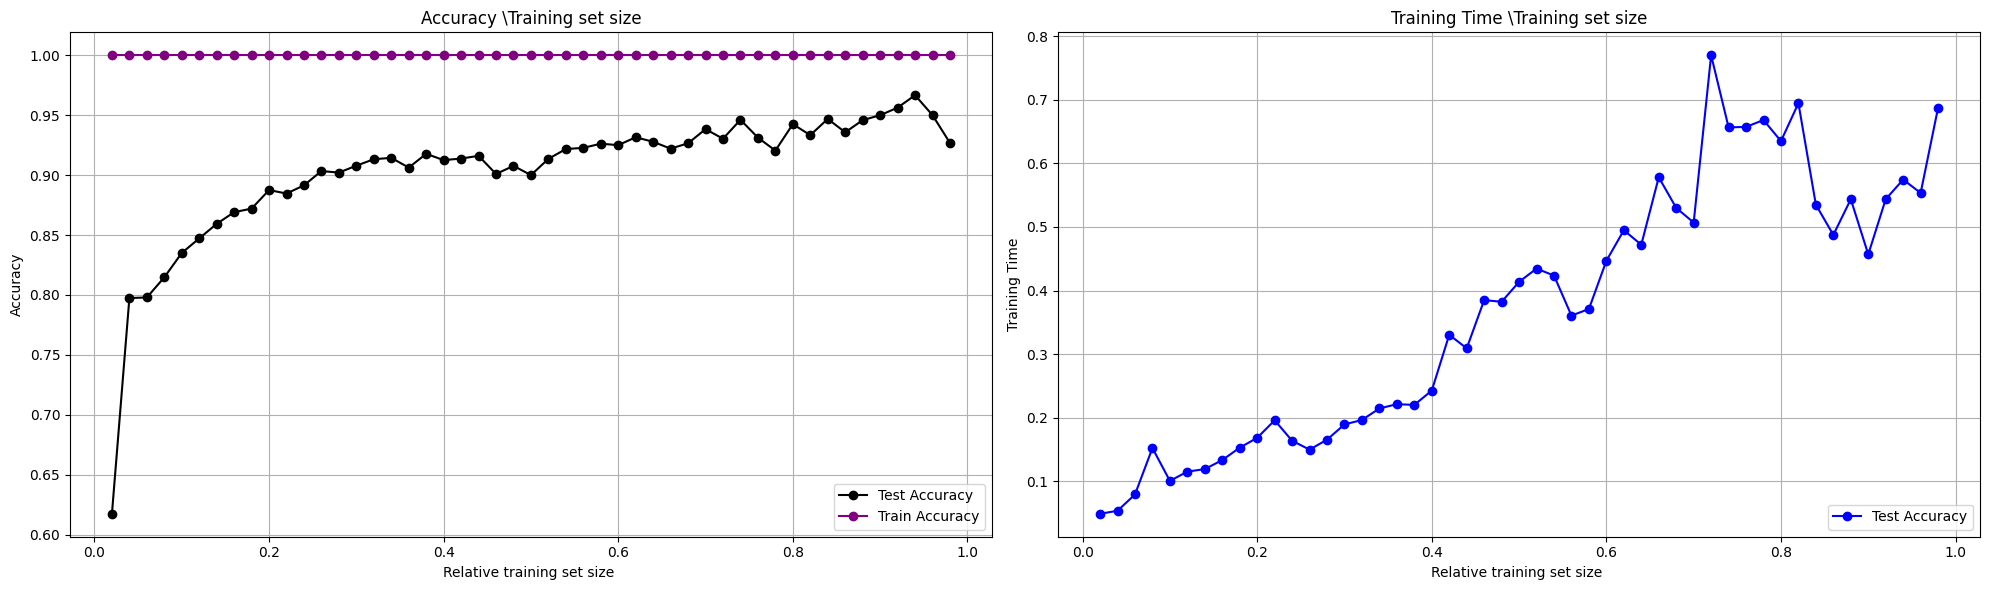

In [31]:
# Una vez hechos hechos los entrenamientos para poder manejar los resultados y gráficos vamos a hacer los plots en una celda siguiente al entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# Gr'afica para la accuracy
ax1.plot(trainSize, testRatios, marker='o', linestyle='-',c='black', label='Test Accuracy')
ax1.plot(trainSize, trainRatios, marker='o', linestyle='-', c='purple', label='Train Accuracy')

ax1.set_title('Accuracy \Training set size')
ax1.set_xlabel('Relative training set size ')
ax1.set_ylabel('Accuracy')

ax1.grid(True)
ax1.legend(loc='lower right')

#  Gr'afica para el trainig time
ax2.plot(trainSize, training_times, marker='o', linestyle='-',c='blue', label='Test Accuracy')

ax2.set_title('Training Time \Training set size')
ax2.set_xlabel('Relative training set size ')
ax2.set_ylabel('Training Time')

ax2.grid(True)
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()


## Discuss

**Convergencia de Precisisón:**
- A medida que el tamaño del conjunto de entrenamiento aumenta, la precisión del modelo en los datos de prueba aumenta hasta cierto punto, después este se estabiliza y permanece casi constante. Esto nos sugiere que a partir de un concreto tamaño de datos en el conjunto de entrenamiento, el modelo no mejora la generalización en el conjunto de pruebas.

**Sobreauste:**
- En la gráfica de precisión, la  precisión del conjunto de entrenamiento es constantemente 1, lo que nos indica que el modelo se ajusta perfectamente a los datos de entrenamiento, Sin embardo, tenemos una brecha entre la precisión de entrenamiento y la de prueba, lo que sugiere un cierto grado de sobreajuste, aunque no es muy significativo, ya que la precisión del conjunto de datos de prueba es bastante alto.

**Tiempo de entrenamiento:**
- Como era de esperar, el tiempo de entrenamiento aumenta a medida que el tamaño del conjunto de entrenamiento se hace más grande.
- Cabe destacar que tenemos una variabilidad en los tiempos de entrenamiento para tamaños de conjunto de entrenamiento grandes. Esto podría deberse a la naturaleza estocástica del descenso de gradiente utilizado por el solver 'sgd'.

**Estabilidad del modelo:**
- Las variaciones ne la precisión de prueba y el tiempo de entrenamiento hacia los tamaños más grandes de conjunto de entrenamiento sugieren que el modelo puede ser sensible a la complsición específica del conjunto de entrenamiento. Esto podría ser una mala señal a la hora de investigar la estabilidad del modelo bajo diferentes particiones de datos o considerar una regularización adicional.

**Promedios:**
- Los valores promedio qe imporimimos al final nos dan una idea general de la precisión y el tiempo de entrenamiento que esperados sobre múltiples particines del conjunto de datos.
- Como bien podemos observar, estos son altos y el tiempo promedio de entrenamiento es razonable para el tamaño del conjunto de datos y con esto, podemos concluir que el modelo es efectivo y eficiente para el problema que tratamos.

# Exercise 4


In [32]:
# Como he comentado con anterioridad, voy a escoger el del ejercicio 2 para realizar las pruebas cambiando los tamanos del conjunto de datos de entrenamiento
# Voy a fijar el número de neuronas por cada a 20 neuronas y las 2 capas

# Vamos a asumir que la ejecución es secuencial por lo que X e y están definidos y no necesitamos repetir imports
from sklearn.metrics import accuracy_score
# Aqui vamos a declarar todos los parámetros variables para el MLP
trainSize = 0.8
testSize = 1. - trainSize
learningRate = np.arange(.02, 1., .02)
training_times = []
test_size_list = []
accuracy_list = []
# Separamos el dataset en entrenamiento y testo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)


# Inicializamos el MLP con la primera iteración de  neuronas de la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=130, alpha=1e-4, solver='sgd', tol=1e-4, 
                    random_state=1, learning_rate_init=.1) # Si molesta mucho eliminamos el verbose

# Procedemos al bucle principal del ejercicio 1
for l in learningRate:
    mlp.set_params(learning_rate_init=l)
    #
    start_time = time () # 
    mlp.fit(X_train, y_train) # Entrenamos el modelo
    end_time = time () # 
    
    training_time = end_time - start_time # Calculamos el tiempo de entrenamiento
    
    
    # Test Accuracy 
    accuracy = mlp.score(X_test, y_test)
    accuracy_list.append(accuracy)
    
    #
    training_times.append(training_time)
    #
    print(f"%Accuracy {accuracy} || %Learning_Rate: {l} ||  Training Time: {training_time}\n")
    
# Vamos a mostrar las medias
avg_accuracy = sum(accuracy_list) / len(accuracy_list) 
avg_training_time = sum(training_times) / len(training_times)

print(f'\n\nAverage Accuracy: {avg_accuracy}')
print(f'Average Training Time: {avg_training_time}')


/Users/alejandro/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


%Accuracy 0.925 || %Learning_Rate: 0.02 ||  Training Time: 1.0541157722473145

%Accuracy 0.92 || %Learning_Rate: 0.04 ||  Training Time: 1.0815010070800781

%Accuracy 0.93 || %Learning_Rate: 0.06 ||  Training Time: 0.7459139823913574

%Accuracy 0.9375 || %Learning_Rate: 0.08 ||  Training Time: 0.6187751293182373

%Accuracy 0.9425 || %Learning_Rate: 0.1 ||  Training Time: 0.646395206451416

%Accuracy 0.9375 || %Learning_Rate: 0.12000000000000001 ||  Training Time: 0.4263637065887451

%Accuracy 0.9325 || %Learning_Rate: 0.13999999999999999 ||  Training Time: 0.4314260482788086

%Accuracy 0.94 || %Learning_Rate: 0.16 ||  Training Time: 0.4239351749420166

%Accuracy 0.92 || %Learning_Rate: 0.18 ||  Training Time: 0.6402897834777832

%Accuracy 0.905 || %Learning_Rate: 0.19999999999999998 ||  Training Time: 1.1044120788574219

%Accuracy 0.925 || %Learning_Rate: 0.22 ||  Training Time: 0.5460090637207031

%Accuracy 0.9275 || %Learning_Rate: 0.24 ||  Training Time: 0.30990004539489746

%Accura

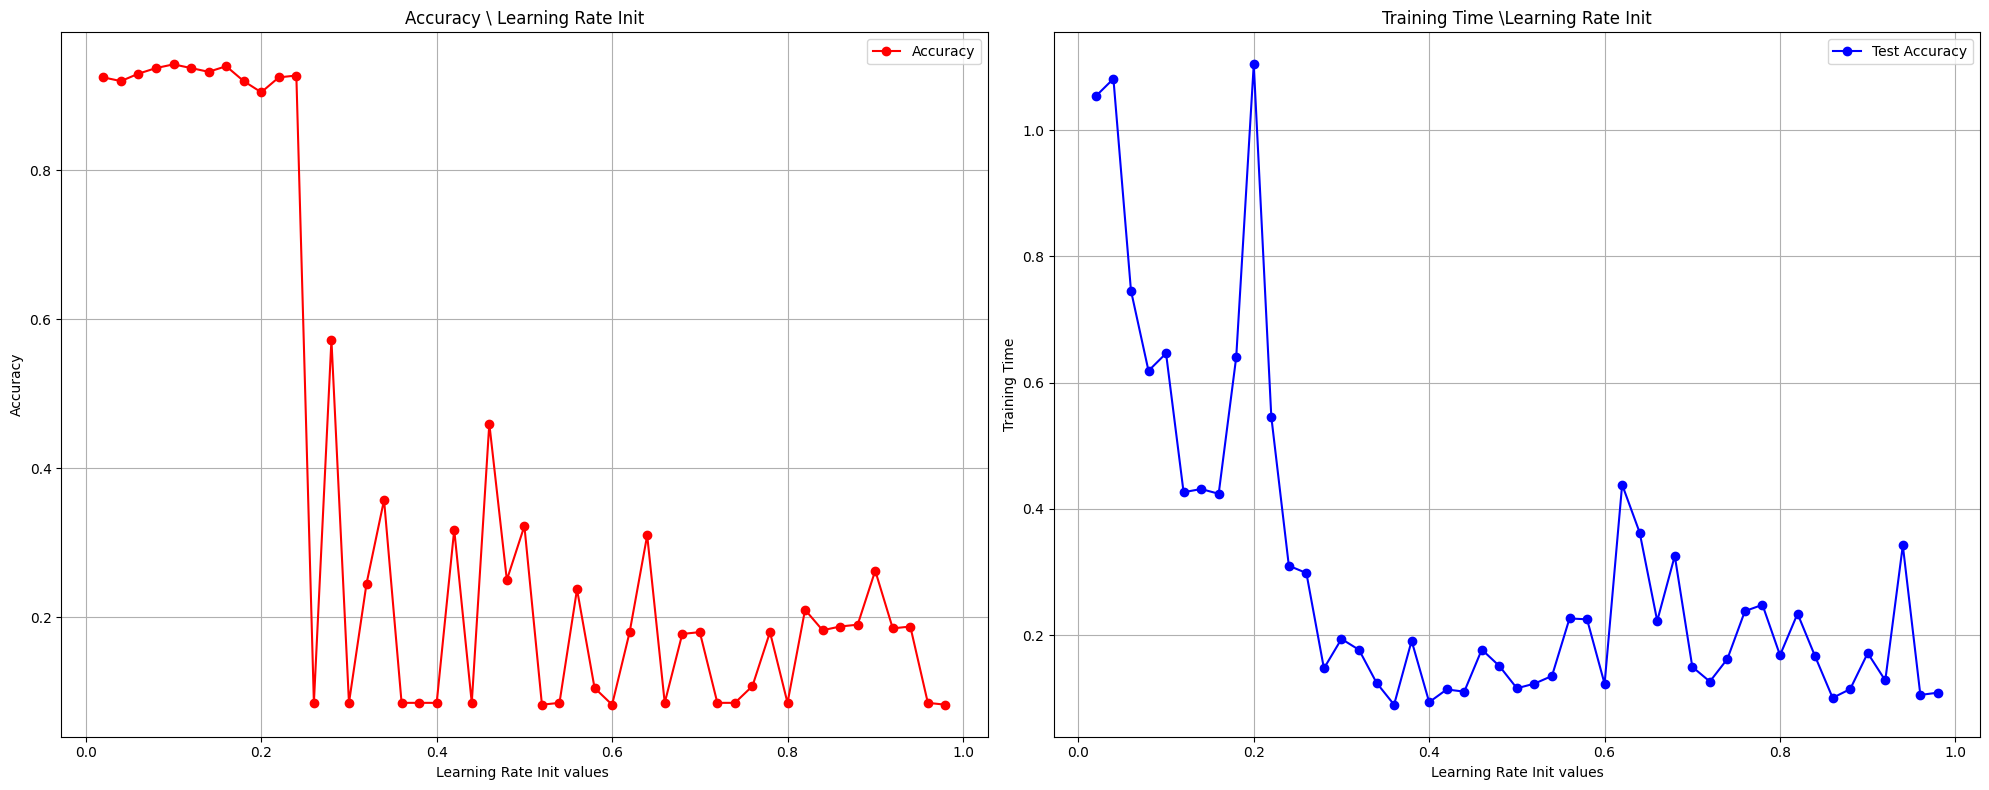

In [33]:
# Una vez hechos hechos los entrenamientos para poder manejar los resultados y gráficos vamos a hacer los plots en una celda siguiente al entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
# Gr'afica para la accuracy
ax1.plot(learningRate, accuracy_list, marker='o', linestyle='-',c='red', label='Accuracy')

ax1.set_title('Accuracy \ Learning Rate Init')
ax1.set_xlabel('Learning Rate Init values ')
ax1.set_ylabel('Accuracy')

ax1.grid(True)
ax1.legend(loc='upper right')

#  Gr'afica para el trainig time
ax2.plot(learningRate, training_times, marker='o', linestyle='-',c='blue', label='Test Accuracy')

ax2.set_title('Training Time \Learning Rate Init')
ax2.set_xlabel('Learning Rate Init values')
ax2.set_ylabel('Training Time')

ax2.grid(True)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


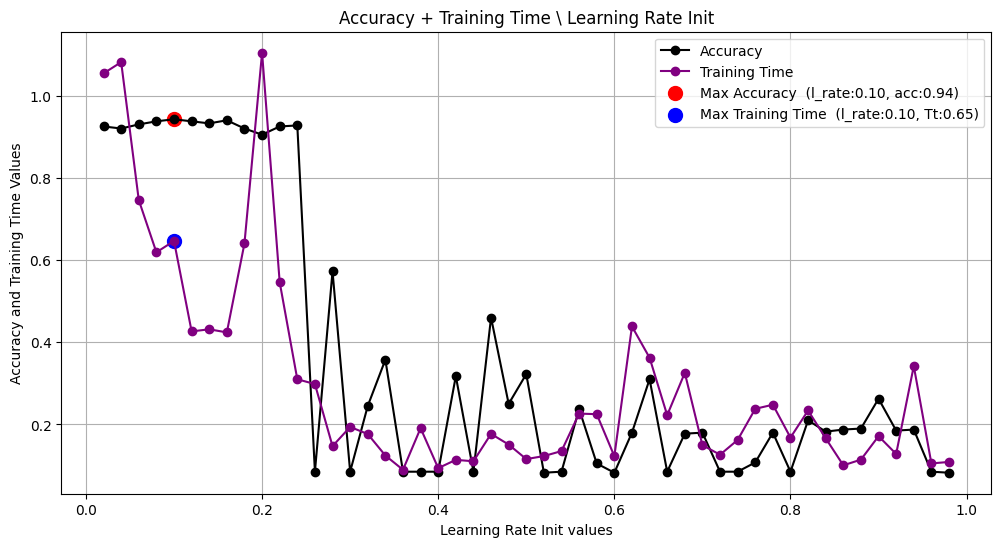

In [34]:
# Aquí voy a hacer las dos superpuestas para tener la gráfica más ampliada
# Vamos a sacar el máximo valor de la accuracy
max_accuracy = max(accuracy_list)
max_accuracy_index = accuracy_list.index(max_accuracy)
max_accuracy_learning_rate = learningRate[max_accuracy_index]
# Ambas gráficas superpuestas
plt.figure(figsize=(12,6))

plt.plot(learningRate, accuracy_list, marker='o', linestyle='-',c='black', label='Accuracy')
plt.plot(learningRate, training_times, marker='o', linestyle='-',c='purple', label='Training Time')
plt.xlabel('Learning Rate Init values')
plt.ylabel('Accuracy and Training Time Values')
plt.scatter(max_accuracy_learning_rate, max_accuracy, color='red', s=100,
            label=f'Max Accuracy  (l_rate:{max_accuracy_learning_rate:.2f}, acc:{max_accuracy:.2f})')
plt.scatter(max_accuracy_learning_rate, training_times[max_accuracy_index], color='blue', s=100,
            label=f'Max Training Time  (l_rate:{max_accuracy_learning_rate:.2f}, Tt:{training_times[max_accuracy_index]:.2f})')

plt.title('Accuracy + Training Time \ Learning Rate Init')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

## Discuss
- Lo que podemos ver de primeras en las gráficas es como varía la tasa de aprendizaje inicial. Este es un parámetro crítico en este tipo de algoritmos basados en gradientes, ya que controla el tamaño de loos pasos que se dan en la dirección del gradiente para minimizar la función de pérdida.

**Precisión frente a Tasa de Aprendizaje:** 
-Podemos ver un pico inicial de alta precisión cuando tenemos una tasa de aprendizaje muy baja, lo que nos sugiere que para tasas muy pequeñas, el modeo coverge bien.
- Por otro lado, a medida que aumentamos este hiperparámetro, la precisión cae drásticamente y luego fluctua. Esto nos asegura que para tasas de aprendizaje altas, nuestro modeo no converge bien sobrepasándo el mínimo global en la función de pérdida.

**Tiempo entrenamiento frende a Tasas de Aprendizaje:**
- El tiempo de entrenamoento tiende a disminuir a medida que aumenta la tasa de aprendizaje.
- Una tasa de aprendizaje más alta puede llevar a pasos más grandes en el espacio de parámetros, lo que podría reducir el número de iteraciones necesarias para converger. Sin embargo, el tiempo de entrenamiento también muestra cierta volatilidad, debido a la falta de convergencia.

# Exercise 5

## Early_stopping y validation_fraction
Estos atributos del MLPClassifier están relacionados con evitar el sobreentrenamiento. 
- **early_stopping**: Es un booleano que indica si utilizar el early_stopping. Si se indica, automaticamente se reserva un 10% de los datos de entrenamiento para la validación y terminará de entrenar cuando la validación no mejore al menos lo indicado en la variable *tol* por el número de iteraciones indicado en *n_iter_no_change*.
- **validation_fraction**: Determina la cantidad de datos de entrenamiento reservados para la validación. Por ejemplo, si se define como 0.1, el 10% de los datos serán de validación y el 90% se usará como entrenamiento.

## Diferencias entre train_test_split
Train_test_split divide un banco de pruebas en datos de entrenamiento y de pruebas. El modelo entrena con todos los datos de entrenamiento disponibles, lo que puede llevar a un sobreentrenamiento.
Usando las opciones anteriores, podemos ser capaces de controlar la cantidad de entrenamiento que se le da al modelo, evitando el sobreentrenamiento validando los resultados del modelo en cada iteración.

## ¿Puede mejorar el rendimiento?
Sí que podría. Actualmente el modelo no evalúa su entrenamiento entre iteraciones, únicamente termina cuando se alcanza un número máximo de iteraciones, haya convergido o no. Utilizando early_stopping, se podría evaluar la calidad del entrenamiento y del modelo y evitar un sobreentrenamiento innecesario al ver que el modelo no mejora o no puede converger. De esta forma, evitamos que el modelo esté muy ligado a los datos de entrenamiento.

In [51]:
# Posible implementación 
# Como he comentado con anterioridad, voy a escoger el del ejercicio 2 para realizar las pruebas cambiando los tamanos del conjunto de datos de entrenamiento
# Voy a fijar el número de neuronas por cada a 20 neuronas y las 2 capas

# Vamos a asumir que la ejecución es secuencial por lo que X e y están definidos y no necesitamos repetir imports
from sklearn.metrics import accuracy_score
# Aqui vamos a declarar todos los parámetros variables para el MLP
trainSize = np.arange(.02, 1., .02)
validationFraction = 1. - trainSize
training_times = []
test_size_list = []
testRatios = []
trainRatios = []
# Separamos el dataset en entrenamiento y testo


# Inicializamos el MLP con la primera iteración de  neuronas de la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=130, alpha=1e-4, solver='sgd', tol=1e-4, 
                    random_state=1, learning_rate_init=.1, early_stopping=True, validation_fraction=.02) # Si molesta mucho eliminamos el verbose

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
# Procedemos al bucle principal del ejercicio 1
for t in trainSize:
    # Primero separamos el dataset 
    mlp.set_params(validation_fraction=t)
    
    #
    start_time = time () # 
    mlp.fit(X_train, y_train) # Entrenamos el modelo
    end_time = time () # 
    
    training_time = end_time - start_time # Calculamos el tiempo de entrenamiento
    
    
    
    # Test Accuracy 
    accuracy_test = mlp.score(X_test, y_test)
    testRatios.append(accuracy_test)
    
    # Train Accuracy
    y_pred_train = mlp.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train) # 
    trainRatios.append(accuracy_train)
    
    #
    training_times.append(training_time)
    #
    print(f"%Test {accuracy_test} || %Train : {accuracy_train} ||  Training Time: {training_time} || Validation_Test: {t}\n")
    
# Vamos a mostrar las medias
avg_accuracy_train = sum(trainRatios) / len(trainRatios) 
avg_accuracy_test = sum(testRatios) / len(testRatios)
avg_training_time = sum(training_times) / len(training_times)

print(f'\n\nAverage Train Accuracy: {avg_accuracy_train}')
print(f'Average Test Accuracy: {avg_accuracy_test}')
print(f'Average Training Time: {avg_training_time}')


%Test 0.9025 || %Train : 0.93625 ||  Training Time: 0.38652920722961426 || Validation_Test: 0.02

%Test 0.9025 || %Train : 0.9425 ||  Training Time: 0.19775795936584473 || Validation_Test: 0.04

%Test 0.9225 || %Train : 0.98625 ||  Training Time: 0.23234224319458008 || Validation_Test: 0.06

%Test 0.9225 || %Train : 0.949375 ||  Training Time: 0.23631000518798828 || Validation_Test: 0.08

%Test 0.92 || %Train : 0.973125 ||  Training Time: 0.18323993682861328 || Validation_Test: 0.1

%Test 0.91 || %Train : 0.9375 ||  Training Time: 0.17108678817749023 || Validation_Test: 0.12000000000000001

%Test 0.91 || %Train : 0.94125 ||  Training Time: 0.155487060546875 || Validation_Test: 0.13999999999999999

%Test 0.9 || %Train : 0.939375 ||  Training Time: 0.19845175743103027 || Validation_Test: 0.16

%Test 0.9125 || %Train : 0.965625 ||  Training Time: 0.2194538116455078 || Validation_Test: 0.18

%Test 0.91 || %Train : 0.955 ||  Training Time: 0.19995498657226562 || Validation_Test: 0.199999999

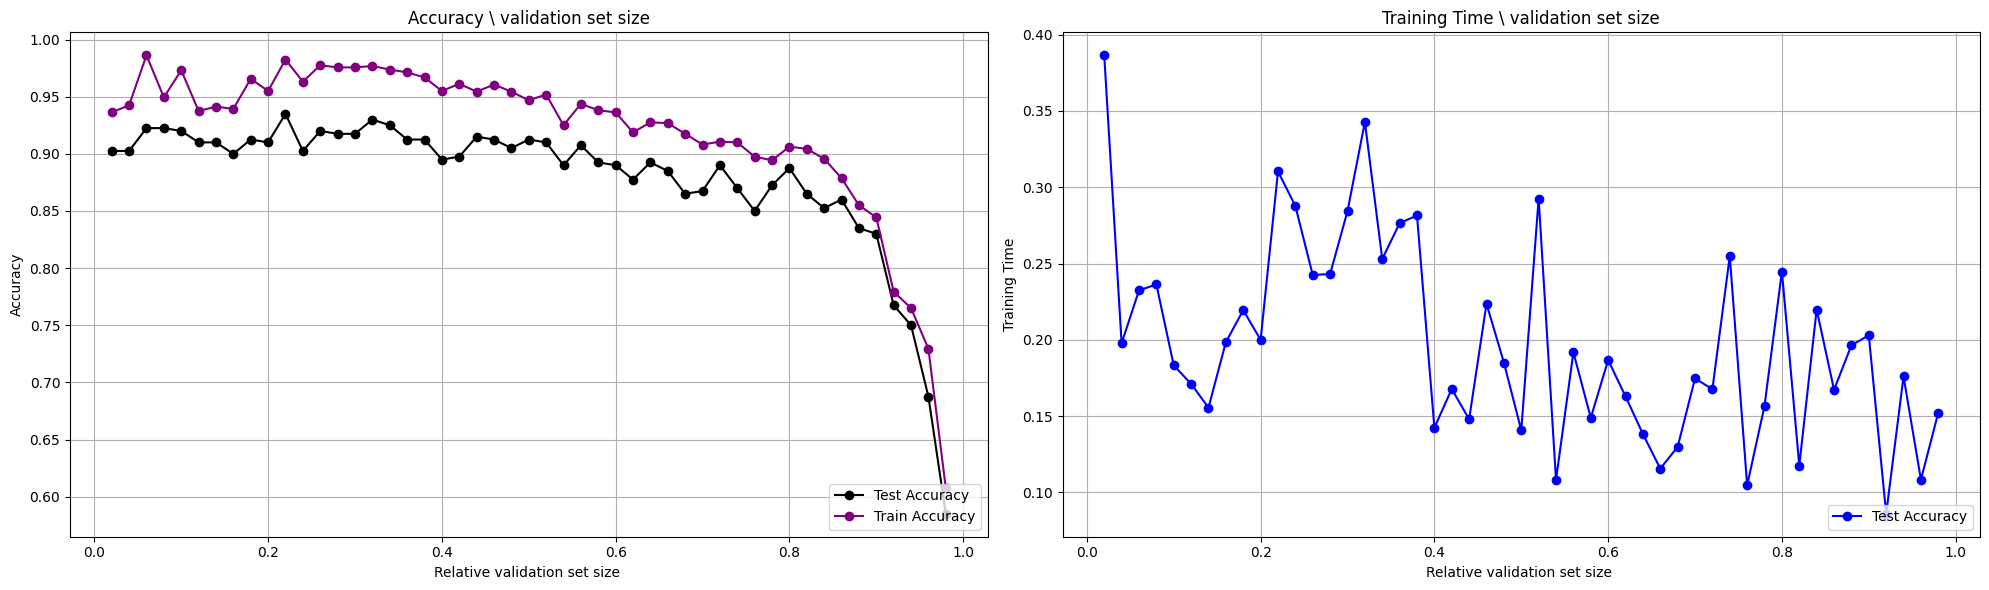

In [52]:
# Una vez hechos hechos los entrenamientos para poder manejar los resultados y gráficos vamos a hacer los plots en una celda siguiente al entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# Gr'afica para la accuracy
ax1.plot(trainSize, testRatios, marker='o', linestyle='-',c='black', label='Test Accuracy')
ax1.plot(trainSize, trainRatios, marker='o', linestyle='-', c='purple', label='Train Accuracy')

ax1.set_title('Accuracy \ validation set size')
ax1.set_xlabel('Relative validation set size ')
ax1.set_ylabel('Accuracy')

ax1.grid(True)
ax1.legend(loc='lower right')

#  Gr'afica para el trainig time
ax2.plot(trainSize, training_times, marker='o', linestyle='-',c='blue', label='Test Accuracy')

ax2.set_title('Training Time \ validation set size')
ax2.set_xlabel('Relative validation set size ')
ax2.set_ylabel('Training Time')

ax2.grid(True)
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()
